#CLASSIFY HANDWRITTEN DIGITS USING CONVOLUTIONAL NEURAL NETWORK

In [0]:
#Description:This program uses convolutional neural network (CNN) to classify handwritten digits as 0 - 9

In [0]:
#Importing required libraries
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten , MaxPooling2D
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np



Using TensorFlow backend.


In [0]:
#Load the data and split it into train and test sets
(X_train,y_train), (X_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [0]:
#first image
X_train[0]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [0]:
#print hte image label
y_train[0]


5

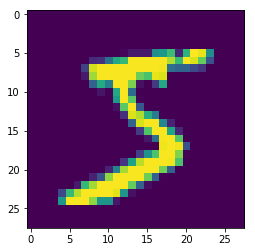

In [0]:
#show the image as picture 
plt.imshow(X_train[0])

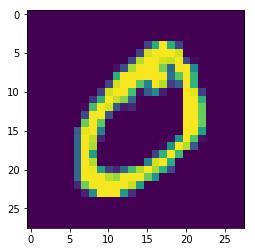

In [0]:
plt.imshow(X_train[1])

In [0]:
#reshape the data to fit the model
X_train = X_train.reshape(60000,28,28,1)#depth of 1 could be grayscale
X_test = X_test.reshape(10000,28,28,1)

In [0]:
#one_hot_encoding
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

#print the new label
print(y_train_one_hot[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
#Bulid a CNN model inspired by LeNet architecture
model=Sequential()
#add model layers
#layer1 combination
model.add(Conv2D(64,(3,3),input_shape=(28,28,1),padding='same',activation='relu'))
#model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
#MaxPooling layer1
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
#layer2 combination
model.add(Conv2D(32,(3,3),padding='same',activation='relu'))
#model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
#model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
#MaxPooling layer2
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
#model.add(Dense(4096,activation='relu'))
#model.add(Dense(4096,activation='relu'))
model.add(Dense(10,activation='softmax'))


In [0]:
#Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
history=model.fit(X_train,y_train_one_hot,validation_data=(X_test,y_test_one_hot),epochs=3)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 91s 2ms/step - loss: 1.1074 - acc: 0.9005 - val_loss: 0.0818 - val_acc: 0.9748
Epoch 2/3
60000/60000 [==============================] - 89s 1ms/step - loss: 0.0694 - acc: 0.9792 - val_loss: 0.0509 - val_acc: 0.9841
Epoch 3/3
60000/60000 [==============================] - 88s 1ms/step - loss: 0.0564 - acc: 0.9829 - val_loss: 0.0487 - val_acc: 0.9842


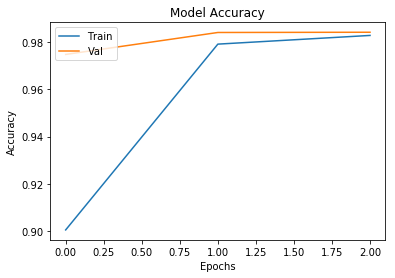

In [0]:
#plot model accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Val'],loc='upper left')
plt.show()

In [0]:
#prediction as probabilities for first 4 images in test set
predictions=model.predict(X_test[:4])
print(predictions)

[[1.12688903e-11 7.92809915e-11 4.08670070e-10 3.78184639e-09
  1.12027656e-13 3.44375814e-13 1.47335730e-20 9.99999523e-01
  9.16019322e-13 4.36860716e-07]
 [1.27024293e-07 3.97803415e-05 9.99944329e-01 8.40609182e-09
  4.21732608e-07 2.24358448e-11 1.51871091e-05 3.20767284e-12
  3.32004646e-09 7.23784694e-08]
 [2.01861965e-07 9.99897122e-01 2.43094803e-07 2.54326125e-07
  7.15479255e-05 2.60594175e-06 9.76079832e-07 1.92362063e-06
  2.28295667e-05 2.31157856e-06]
 [9.99917865e-01 6.43628308e-16 3.80706267e-09 4.18713020e-09
  1.26105002e-08 1.78736087e-07 6.15372046e-05 1.12205634e-09
  2.86990399e-07 2.01402945e-05]]


In [0]:
#predictions as first 4 labels for test set
print(np.argmax(predictions,axis=1))
print(y_test[:4])

[7 2 1 0]
[7 2 1 0]


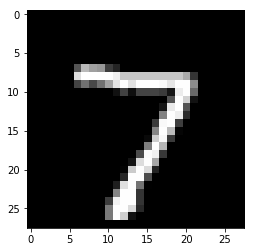

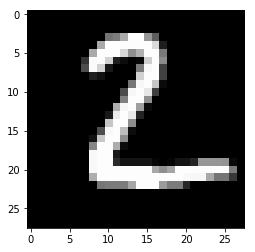

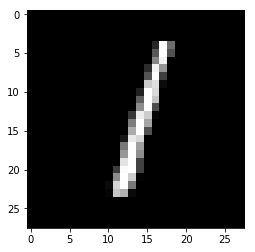

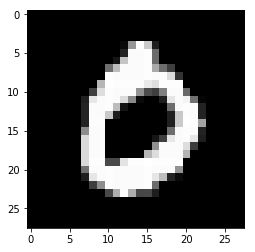

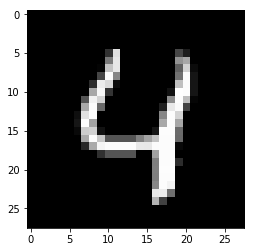

In [0]:
#print first fours images in test set
for i in range(5):
  image=X_test[i]
  image=np.array(image,dtype='float')
  pixels=image.reshape((28,28))
  plt.imshow(pixels,cmap='gray')
  plt.show()